## Data Visualization using Seaborn 

In [ ]:
Datasource- Fictitious dataset

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
tips = sns.load_dataset('tips')

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##### Distribution Plot

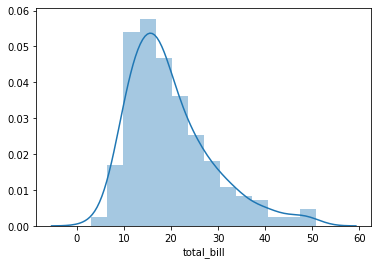

In [13]:
sns.distplot(tips['total_bill']) #just pass in a single column

# to check how 'total_bill' is distributed in the data

# to remove the kde curve line use -- kde=False as argument

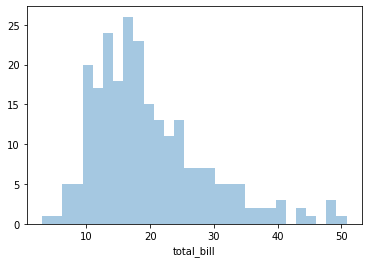

In [15]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

##### Joint Plot

In [ ]:
###### This allows you to match up two distplots for bivariate data with your choice of 'Kind'

# parameter to compare with:
    
#     - 'scatter'
#     - 'reg'
#     - 'resid'
#     - 'kde'
#     - 'hex'

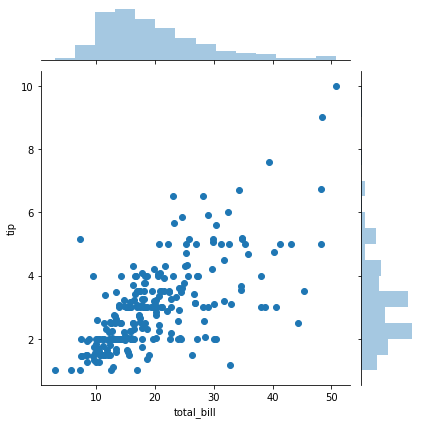

In [18]:
sns.jointplot(x='total_bill',y='tip',data=tips)

# The default kind is scatter plot

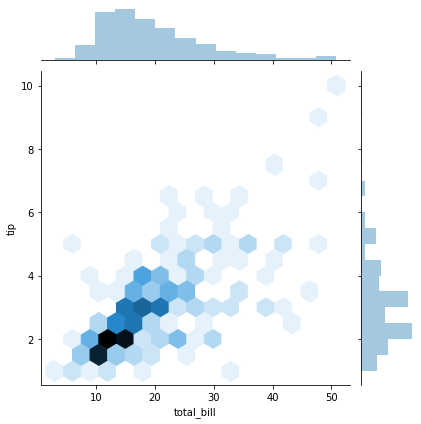

In [19]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

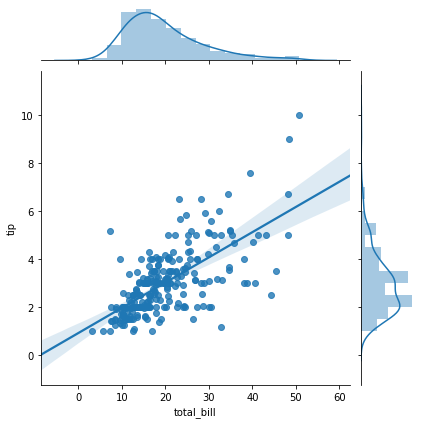

In [20]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg') #regression plot

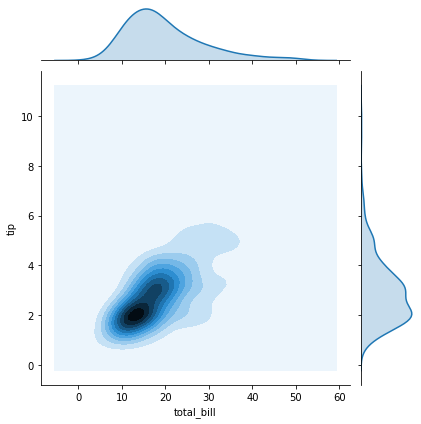

In [21]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

# it shows the density where the points match up the most

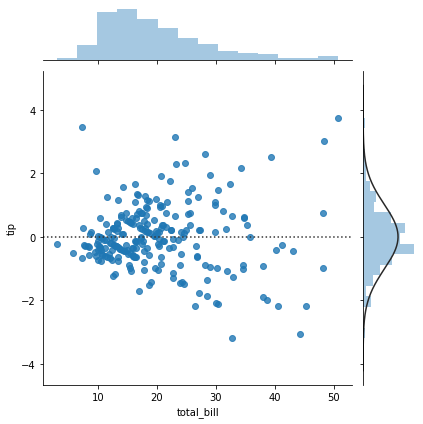

In [22]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='resid')

##### Pair Plot

In [23]:
# Pair plot will plot pairwise relationship across an entire dataframe (for numerical columns)
# and support color hue argument (for categorical columns)

# In this example, it will basically do the Joint Plots for every possible combination 
# of the numerical columns

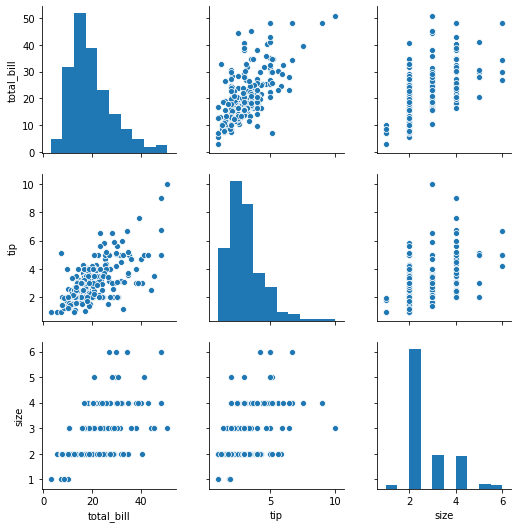

In [24]:
sns.pairplot(tips) #just pass in your dataset

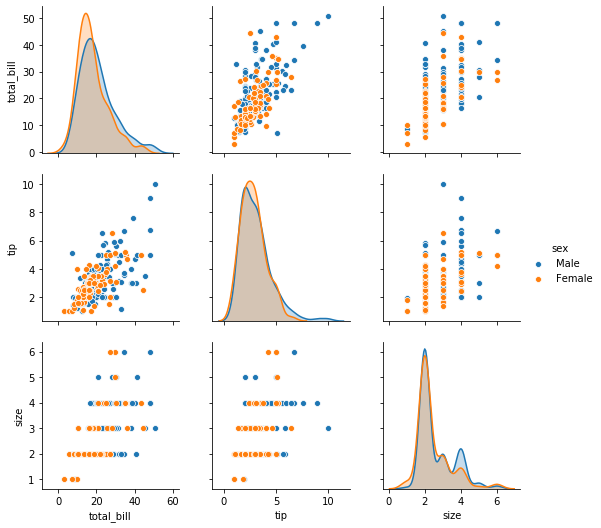

In [25]:
sns.pairplot(tips,hue='sex')

# you can hue argument for any categorical field- like 'sex' in this example
# You'll see the legends on the side

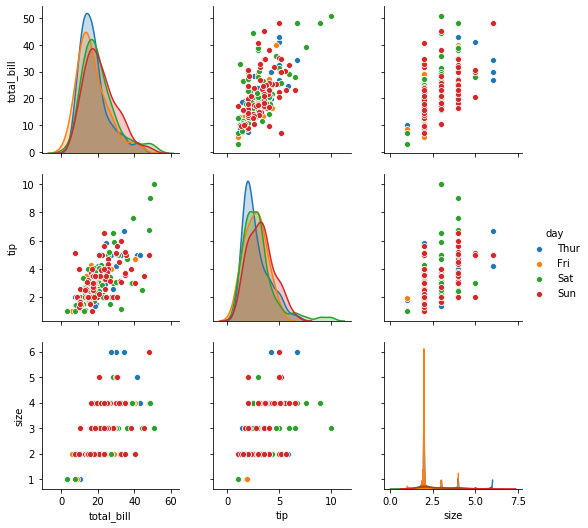

In [26]:
# to check tips based on day

sns.pairplot(tips,hue='day')

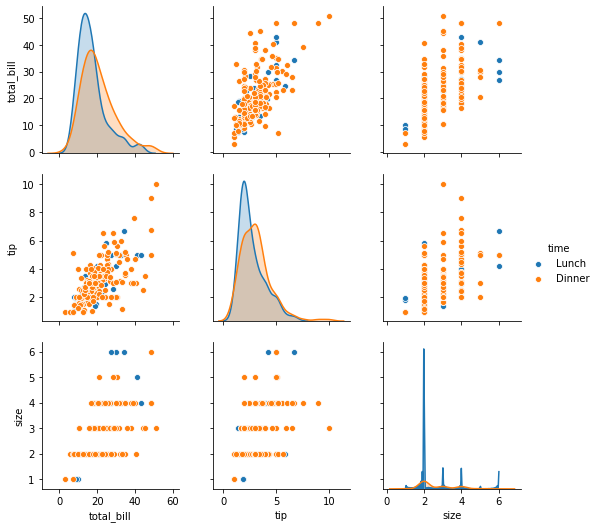

In [27]:
sns.pairplot(tips,hue='time')

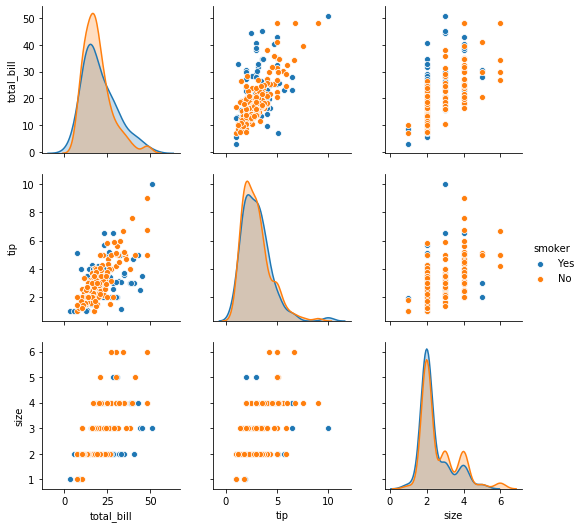

In [28]:
sns.pairplot(tips,hue='smoker')

##### Rug Plots

In [29]:
# They are building blocks for KDE plots 
# They just draw a dash mark for every point on a univariate distribution

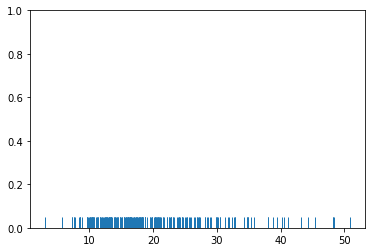

In [30]:
sns.rugplot(tips['total_bill'])

# you can compare with a histogram based on the density here
# KDE are made based on the density of the rug plots

##### KDE Plots

In [32]:
# 'Kernel Density Estimation' plots

# KDEs replace every single observ. with a Guassian (normal) distribution centered around
# that value

# Example:


(0, 1)

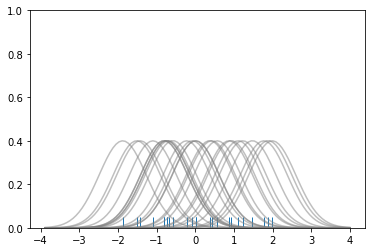

In [33]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

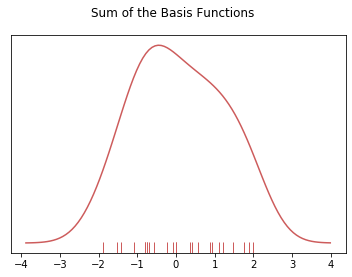

In [34]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

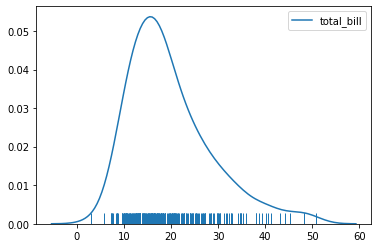

In [35]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

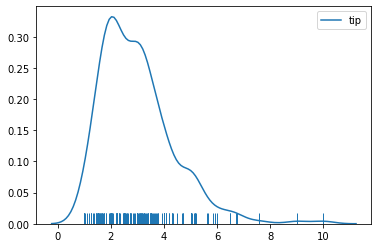

In [36]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

### Categorical Plots

###### Use the Tips as above

In [38]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##### Bar Plot

In [39]:
# It allows you to aggregate the categorical data based off some function,
# by default the mean

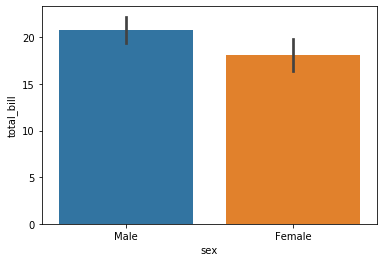

In [40]:
sns.barplot(x='sex',y='total_bill',data=tips)

# categotrical vs. NUmerical field

In [41]:
import numpy as np

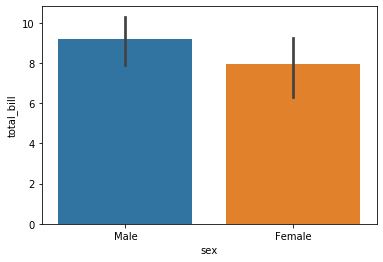

In [42]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

##### Count Plot

In [44]:
# Same as Box Plot, but here estimator is just counting the number of occurences
# So only x value is required

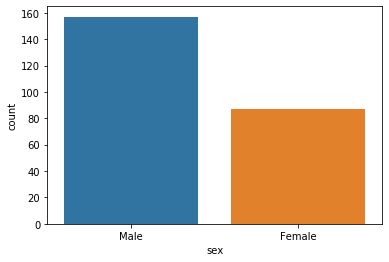

In [45]:
sns.countplot(x='sex',data=tips)

##### Boxplot and Violinplot

In [46]:
# They are used to see the distribution of Categorical data


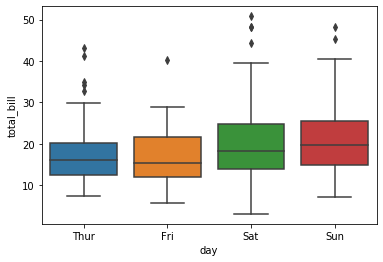

In [48]:
sns.boxplot(x='day',y='total_bill',data=tips)

# x = categorical
# y = numerical

# you can use this to check for outliers

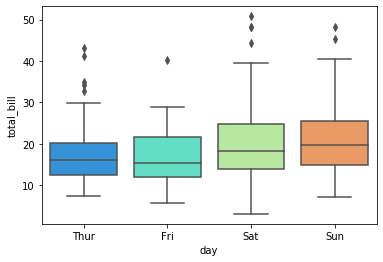

In [49]:
sns.boxplot(x='day',y='total_bill',data=tips,palette='rainbow')

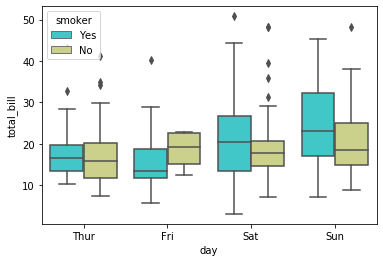

In [51]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker',palette='rainbow')

##### Voilin Plot

In [ ]:
# It can be interpreted as KDE of the underlying distribution
# harder to interpret compared to box and whisker plot

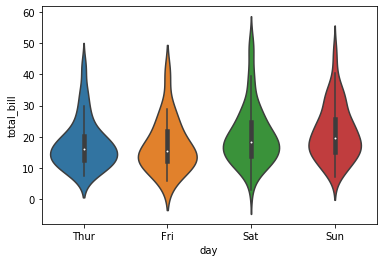

In [52]:
sns.violinplot(x='day',y='total_bill',data=tips)

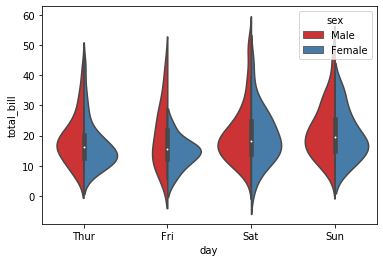

In [55]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True,palette='Set1')

##### Strip Plot

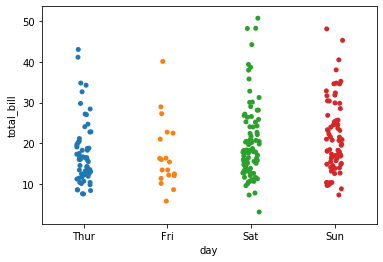

In [56]:
sns.stripplot(x='day',y='total_bill',data=tips)

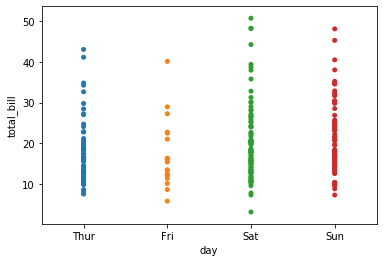

In [58]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=False)

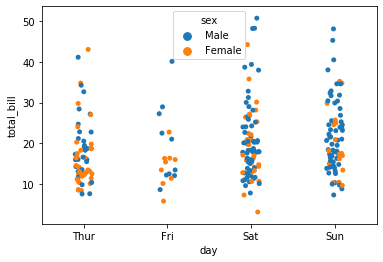

In [61]:
sns.stripplot(x='day',y='total_bill',data=tips,hue='sex')

##### Swarm Plot

In [62]:
# Kind of like Split plot + Violin plot

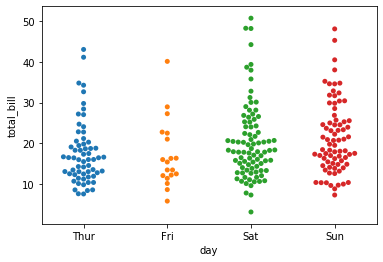

In [63]:
sns.swarmplot(x='day',y='total_bill',data=tips)

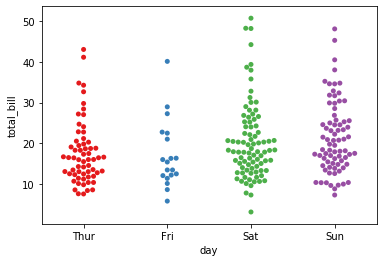

In [64]:
sns.swarmplot(x='day',y='total_bill',data=tips,palette='Set1')

#### Combining Voilin Plot and Swarm Plot

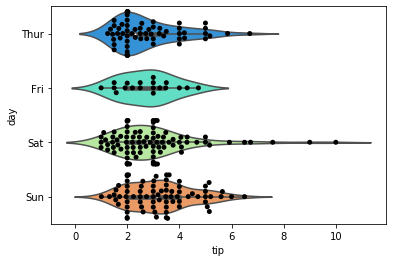

In [66]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black')

#### Factor Plot

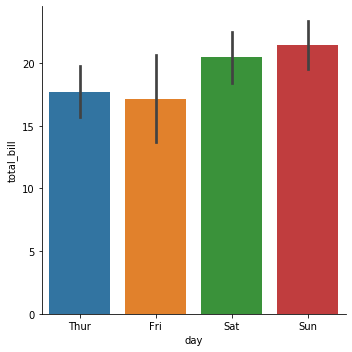

In [68]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

#it is general form

### MATRIX PLOT

In [3]:
# seaborn already import at the top 
# Tips data already defined at the top

In [4]:
flights = sns.load_dataset('flights')

In [5]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


##### Heat Maps

In [7]:
# For Heat map to work properly your data should already be in the form of Matrix
# means that the index name and column name should match-up
# like you to do pivot table

In [12]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [10]:
tc = tips.corr()

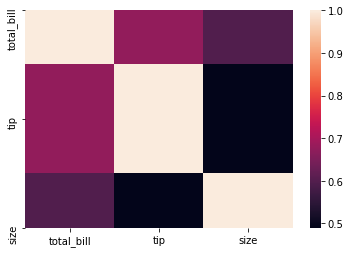

In [11]:
sns.heatmap(tc)

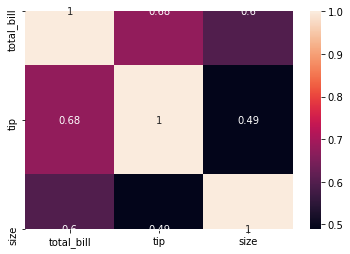

In [13]:
sns.heatmap(tc,annot=True)

In [14]:
# Converts flight data into matrix form

flights.pivot_table(index='month',columns='year',values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [15]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

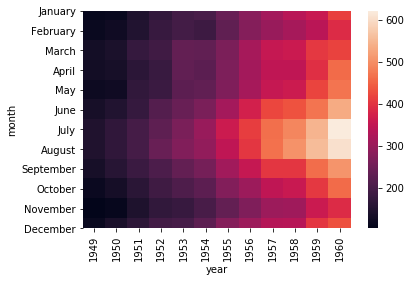

In [16]:
sns.heatmap(fp)

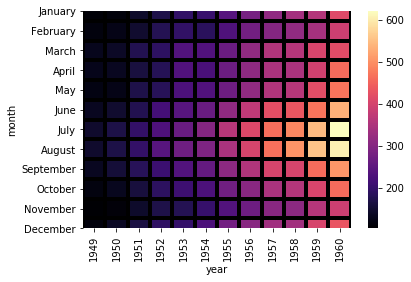

In [20]:
sns.heatmap(fp,cmap='magma', linecolor='black',linewidths=3)

##### Clustered Map

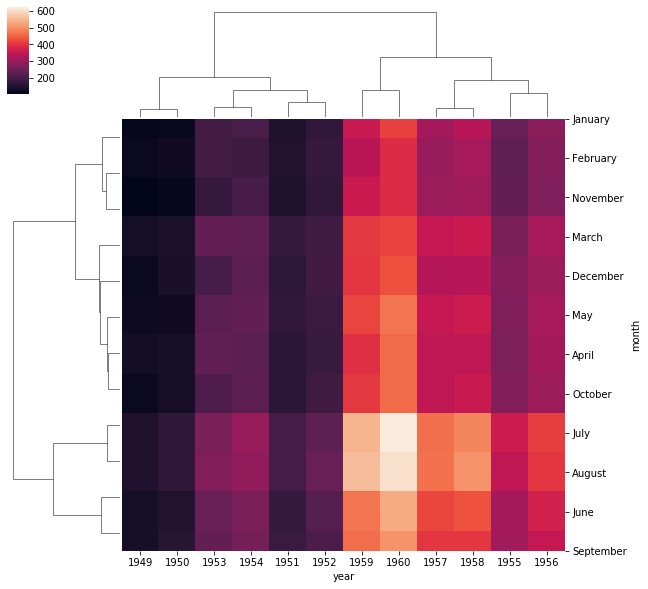

In [22]:
sns.clustermap(fp)


# This clusters the columns and rows to shows the data which are similar regardless 
# of the order

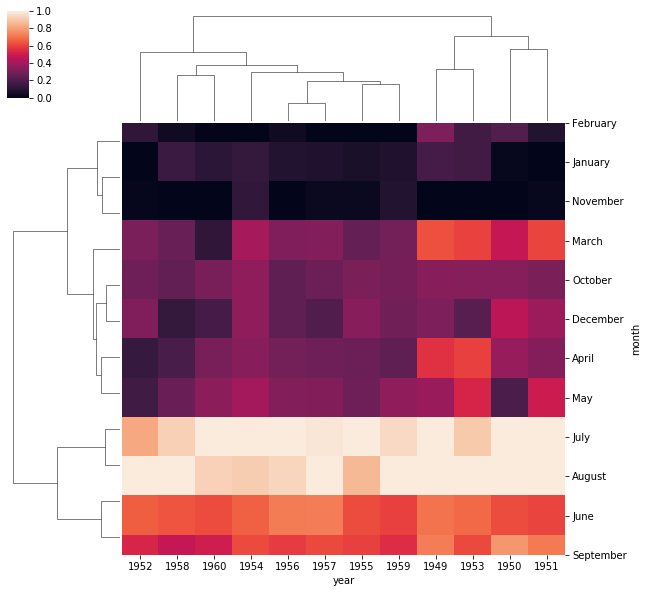

In [23]:
sns.clustermap(fp,standard_scale=1)

### GRIDS

In [24]:
# to automate subplots based on our data

In [25]:
# Loading the inbuilt python iris dataset

iris = sns.load_dataset('iris')

In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

##### Pair Plot

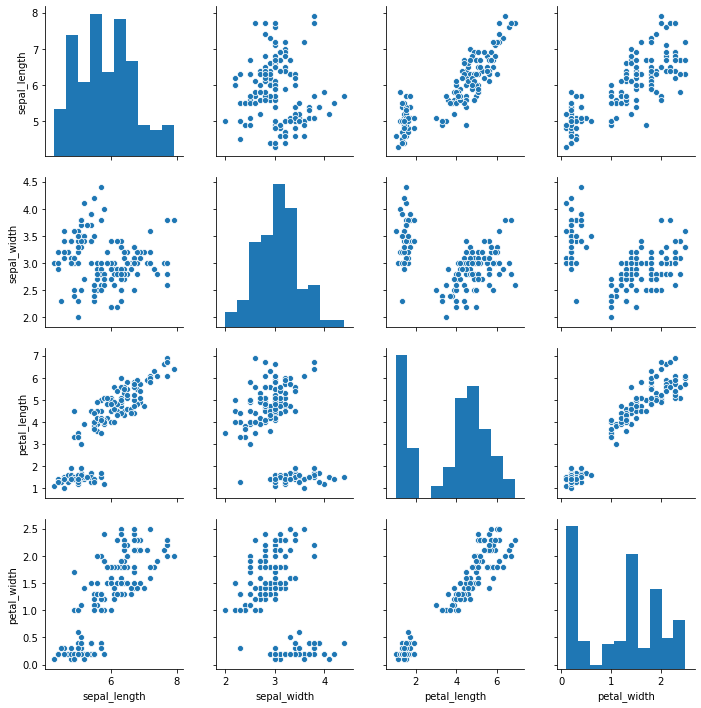

In [28]:
# It is like an automated Joint Plot from Distribution Plot

sns.pairplot(iris)

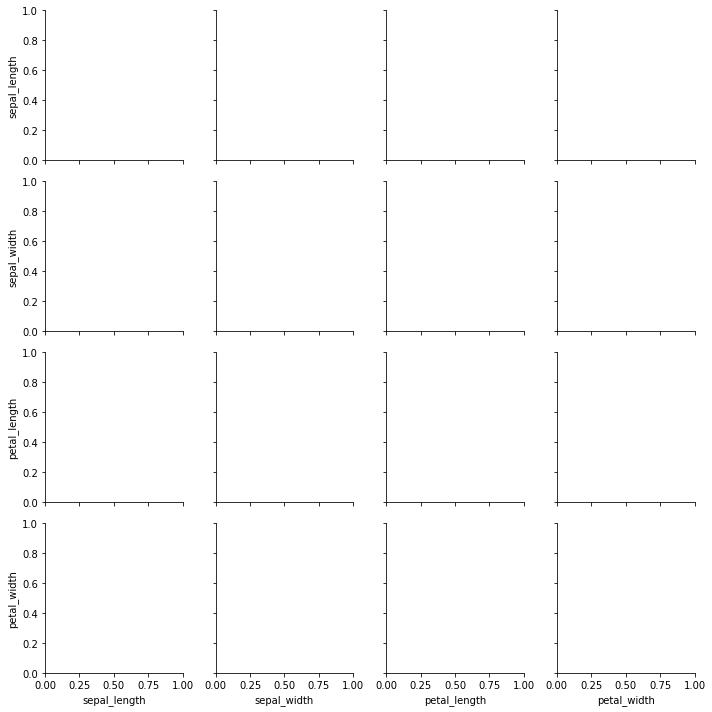

In [29]:
sns.PairGrid(iris)

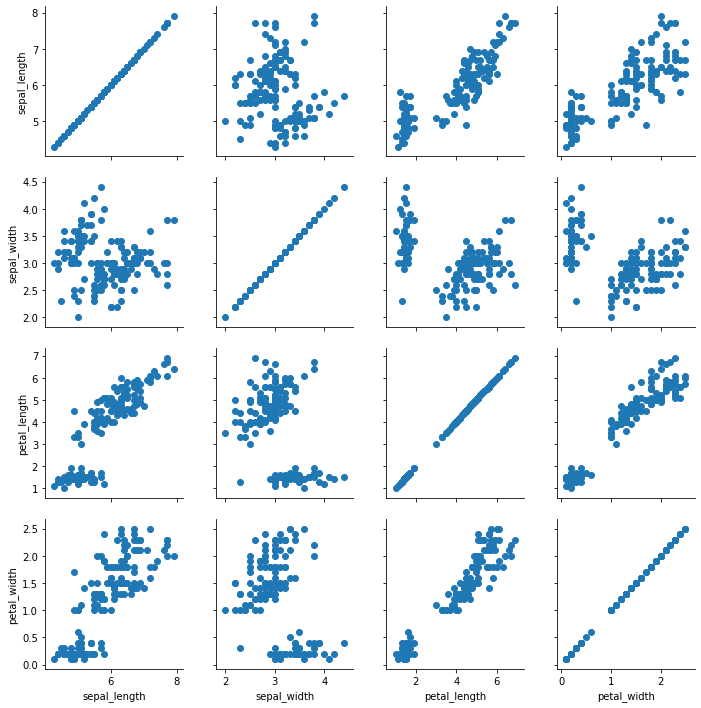

In [31]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

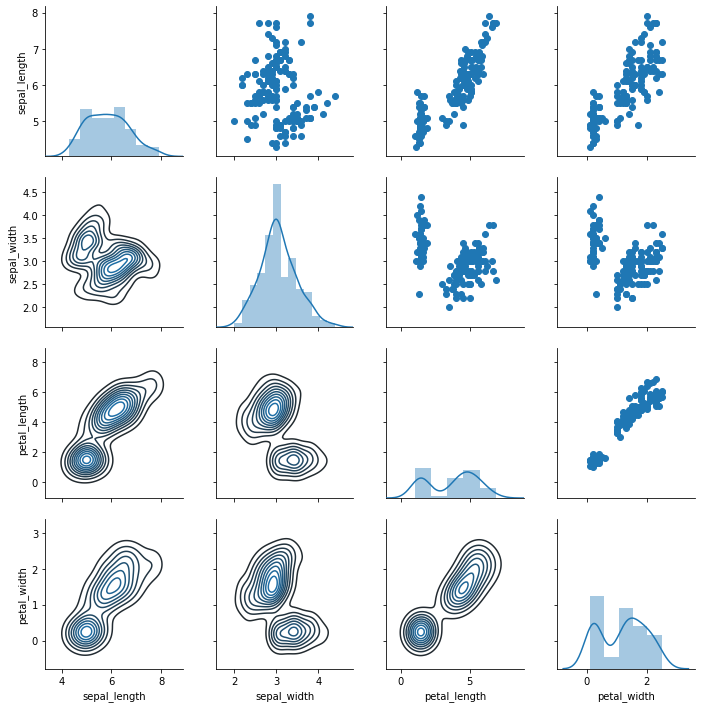

In [32]:
# We can choose what to draw on the diagonal, lower and upper plots seperately in the matrix

g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

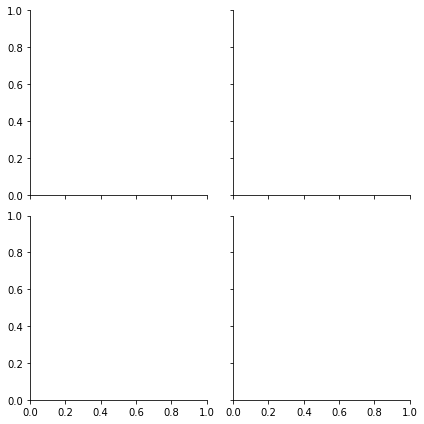

In [33]:
# Doing the similar with Tips data
# Using Facet Grid -- It is important 

g = sns.FacetGrid(data=tips,col='time',row='smoker')

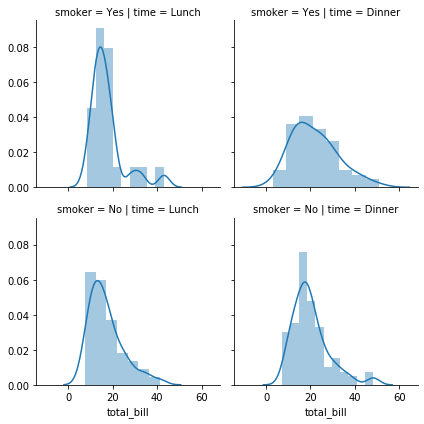

In [34]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill') #distplot only needs 1 argument

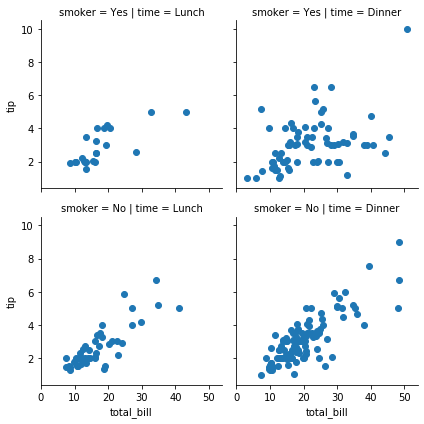

In [36]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip') #needs 2 arguments

### Regression Plots -- Just LM Plot Fuction

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
# Using Linear Model Plot

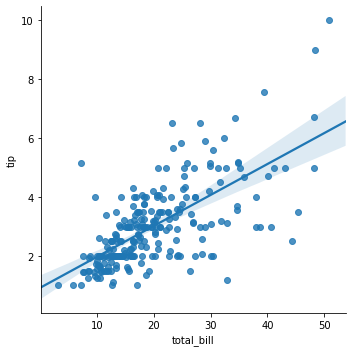

In [39]:
sns.lmplot(x='total_bill',y='tip',data=tips)

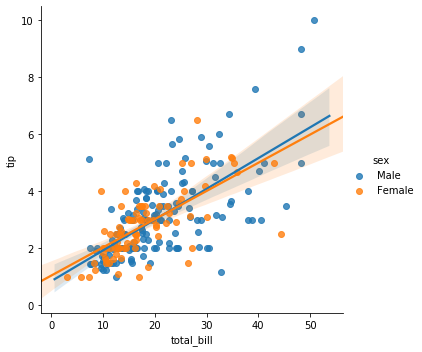

In [40]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

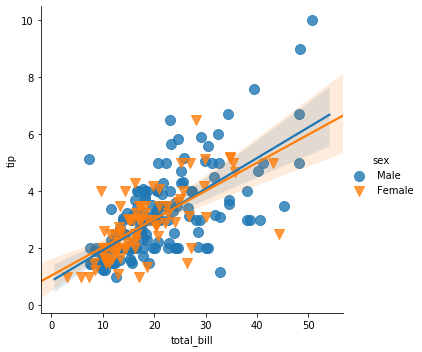

In [41]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],scatter_kws={'s':100})

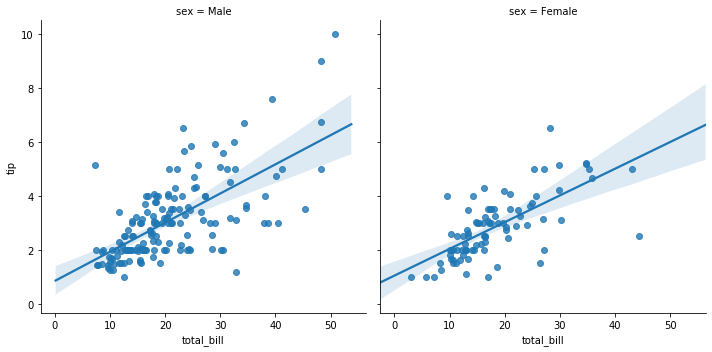

In [43]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

# now we have 2 columns - male and female 

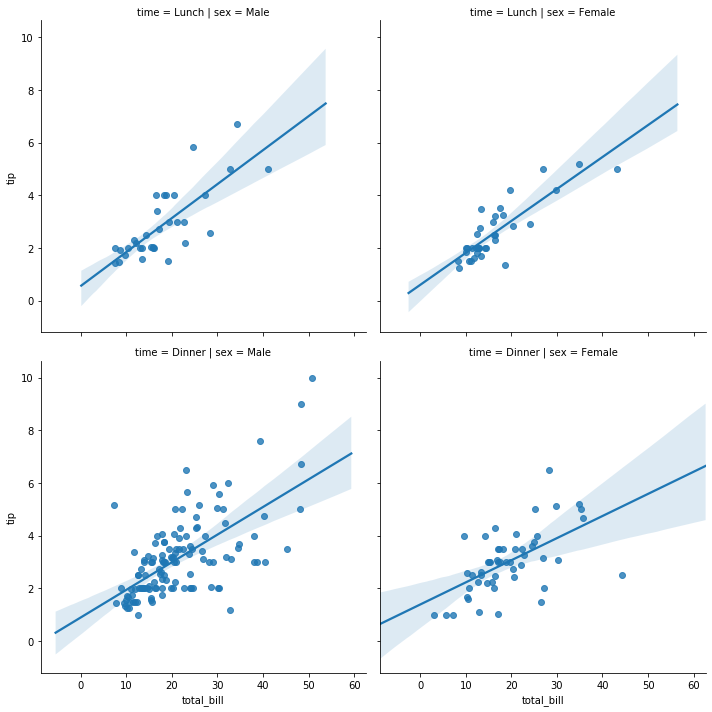

In [45]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time')



### Style and Color

In [46]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


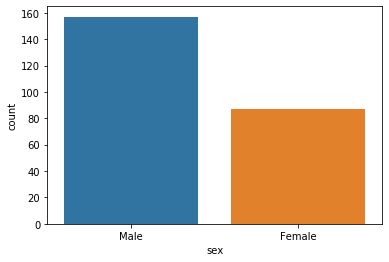

In [47]:
sns.countplot(x='sex',data=tips)

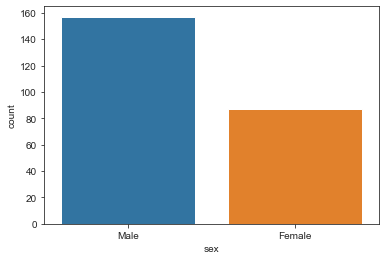

In [50]:
sns.set_style('ticks')

# Cmd + tab to learn about more style
sns.countplot(x='sex',data=tips)

# to remove the from the plot
# use- sns.despine()

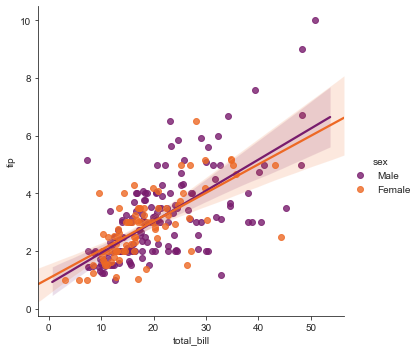

In [54]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='inferno')